<div style="text-align:left">

### Culinary Matcher: Multilingual Recipe Recommendation System Based on Ingredients

#### Mt. SAC CISB 63 Midterm Project Fall 2023

#### Vedavit Shetty
    
</div>

The Culinary Matcher is a sophisticated recipe recommendation tool created to assist users in discovering new culinary delights based on ingredients they have available. Going beyond merely listing out recipes with the specified ingredients, the system employs Natural Language Processing (NLP) techniques such as tokenization, Part-of-Speech (POS) tagging, Named Entity Recognition (NER), and TF-IDF weighting. With the integration of cosine similarity scores, it recommends the most relevant recipes. Moreover, the system boasts a multilingual feature, enabling users to receive recipe details, including titles, ingredients, and instructions, translating it to the language of their choice.

In [1]:
#ignore warnings:
import warnings
warnings.filterwarnings("ignore")
!pip install textblob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [2]:
#!pip install WordCloud

# Import necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.chunk import ne_chunk
import re
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# download stopwords, punkt, and averaged_perceptron_tagger, maxent_ne_chunker, and words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/vedavitshetty/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
recipes = pd.read_csv('recipes.csv', index_col=0)

In [4]:
recipes

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."
...,...,...,...,...,...
13496,Brownie Pudding Cake,"['1 cup all-purpose flour', '2/3 cup unsweeten...",Preheat the oven to 350°F. Into a bowl sift to...,brownie-pudding-cake-14408,"['1 cup all-purpose flour', '2/3 cup unsweeten..."
13497,Israeli Couscous with Roasted Butternut Squash...,"['1 preserved lemon', '1 1/2 pound butternut s...",Preheat oven to 475°F.\nHalve lemons and scoop...,israeli-couscous-with-roasted-butternut-squash...,"['1 preserved lemon', '1 1/2 pound butternut s..."
13498,Rice with Soy-Glazed Bonito Flakes and Sesame ...,['Leftover katsuo bushi (dried bonito flakes) ...,"If using katsuo bushi flakes from package, moi...",rice-with-soy-glazed-bonito-flakes-and-sesame-...,['Leftover katsuo bushi (dried bonito flakes) ...
13499,Spanakopita,['1 stick (1/2 cup) plus 1 tablespoon unsalted...,Melt 1 tablespoon butter in a 12-inch heavy sk...,spanakopita-107344,['1 stick (1/2 cup) plus 1 tablespoon unsalted...


# Exploratory Data Analysis (EDA)

Check for missing or null values and handle it

In [5]:
recipes.isnull().sum()

Title                  5
Ingredients            0
Instructions           8
Image_Name             0
Cleaned_Ingredients    0
dtype: int64

In [6]:
recipes.dropna(inplace=True)

Inspect the Data

In [7]:
recipes.describe()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
count,13493,13493,13493,13493,13493
unique,13302,13471,13464,13464,13471
top,Potato Latkes,[],Place ingredients in blender in the order list...,#NAME?,['']
freq,5,6,5,30,6


Drop the rows where the ingredients are not listed

In [8]:
# Filter out rows where Cleaned_Ingredients is "[]"
recipes = recipes[recipes['Ingredients'] != '[]']

In [9]:
recipes.describe()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
count,13487,13487,13487,13487,13487
unique,13296,13470,13458,13458,13470
top,French 75,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey...",Place ingredients in blender in the order list...,#NAME?,"['1 cube or 1/2 teaspoon sugar', '4 dashes Pey..."
freq,5,4,5,30,4


Data looks good, let's continue to inspect the data

In [10]:
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- to 1-pound) round Italian loaf, cut in..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho..."


In [11]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13487 entries, 0 to 13500
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                13487 non-null  object
 1   Ingredients          13487 non-null  object
 2   Instructions         13487 non-null  object
 3   Image_Name           13487 non-null  object
 4   Cleaned_Ingredients  13487 non-null  object
dtypes: object(5)
memory usage: 632.2+ KB


#### Visualizations

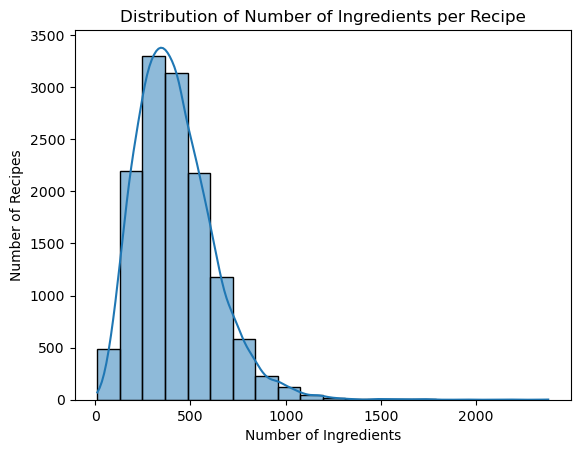

In [12]:
# Distribution of Number of Ingredients per Recipe
recipes['num_ingredients'] = recipes['Ingredients'].apply(len)
sns.histplot(recipes['num_ingredients'], bins=20, kde=True)
plt.title('Distribution of Number of Ingredients per Recipe')
plt.xlabel('Number of Ingredients')
plt.ylabel('Number of Recipes')
plt.show()

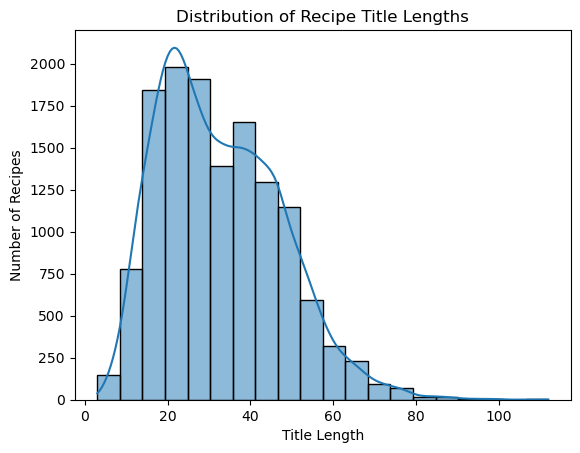

In [13]:
# Recipe Title Lengths
recipes['title_length'] = recipes['Title'].apply(len)
sns.histplot(recipes['title_length'], bins=20, kde=True)
plt.title('Distribution of Recipe Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Number of Recipes')
plt.show()

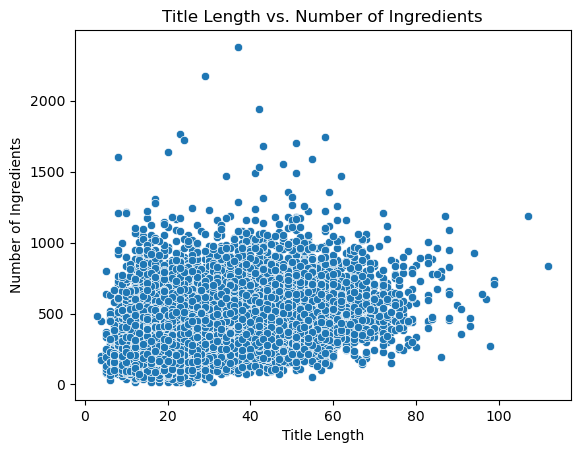

In [14]:
sns.scatterplot(x=recipes['title_length'], y=recipes['num_ingredients'])
plt.title('Title Length vs. Number of Ingredients')
plt.xlabel('Title Length')
plt.ylabel('Number of Ingredients')
plt.show()

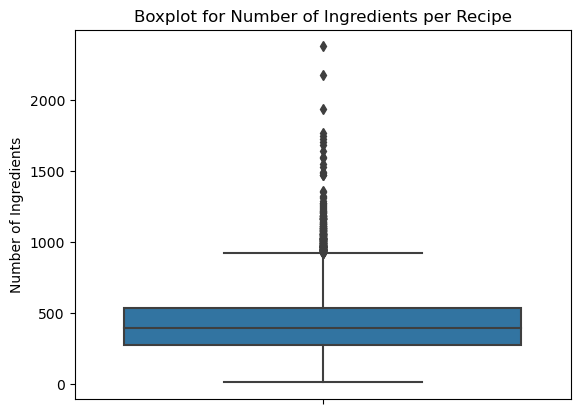

In [15]:
sns.boxplot(y=recipes['num_ingredients'])
plt.title('Boxplot for Number of Ingredients per Recipe')
plt.ylabel('Number of Ingredients')
plt.show()

Some analysis:
- 75% of recipes have about 600 or less ingredients with the middle 50% containing about 100 to 600 ingredients
- There's not a strong correlation between recipe title and number of ingredients
- The distribution for recipe title lengths appears to be normally distributed around 20 to 40 characters.

# Apply NLP Techniques to preprocess the data

Removing Stopwords and Lowercasing

In [16]:
stop = set(stopwords.words('english'))

recipes['Cleaned_Ingredients'] = recipes['Cleaned_Ingredients'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word.lower() not in stop]))
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12


Tokenization

In [17]:
recipes['Tokenized_Ingredients'] = recipes['Cleaned_Ingredients'].apply(word_tokenize)
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length,Tokenized_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54,"[[, ', 1, (, 3½–4-lb, ., ), whole, chicken, ',..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31,"[[, ', 2, large, egg, whites, ', ,, ', 1, poun..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27,"[[, ', 1, cup, evaporated, milk, ', ,, ', 1, c..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34,"[[, ', 1, (, ¾-, 1-pound, ), round, italian, l..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12,"[[, ', 1, teaspoon, dark, brown, sugar, ', ,, ..."


POS (Part-of-Speech) Tagging

In [18]:
recipes['POS_Tagged_Ingredients'] = recipes['Tokenized_Ingredients'].apply(nltk.pos_tag)
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length,Tokenized_Ingredients,POS_Tagged_Ingredients
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54,"[[, ', 1, (, 3½–4-lb, ., ), whole, chicken, ',...","[([, NN), (', ''), (1, CD), ((, (), (3½–4-lb, ..."
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31,"[[, ', 2, large, egg, whites, ', ,, ', 1, poun...","[([, NN), (', ''), (2, CD), (large, JJ), (egg,..."
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27,"[[, ', 1, cup, evaporated, milk, ', ,, ', 1, c...","[([, NN), (', ''), (1, CD), (cup, NNS), (evapo..."
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34,"[[, ', 1, (, ¾-, 1-pound, ), round, italian, l...","[([, NN), (', ''), (1, CD), ((, (), (¾-, JJ), ..."
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12,"[[, ', 1, teaspoon, dark, brown, sugar, ', ,, ...","[([, NN), (', ''), (1, CD), (teaspoon, NN), (d..."


Word Cloud

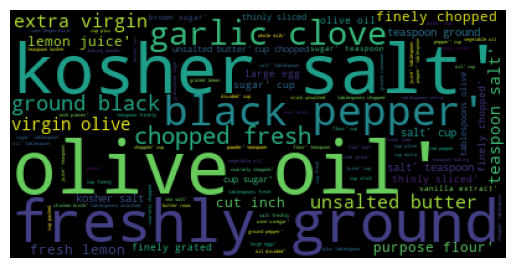

In [19]:
from wordcloud import WordCloud

text = ' '.join(recipes['Cleaned_Ingredients'])
wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Frequency Distribution

In [20]:
all_words = ' '.join(recipes['Cleaned_Ingredients']).split()
fdist = FreqDist(all_words)
fdist.most_common(10)

[("'1", 37955),
 ('cup', 28116),
 ("'2", 21701),
 ('teaspoon', 15987),
 ('tablespoons', 15543),
 ("'1/2", 13440),
 ('fresh', 10109),
 ('cups', 10075),
 ("'1/4", 9645),
 ('1/2', 9173)]

NER (Named Entity Recognition)

In [21]:
# NER (Named Entity Recognition) Function
# This function identifies notable entities within the given text.
# Specifically, it searches for Geopolitical entities (GPE), Personal names (PERSON), and Organizations (ORGANIZATION).
def named_entity_recognition(text):
    tree = ne_chunk(nltk.pos_tag(word_tokenize(text)))
    named_entities = []
    for subtree in tree.subtrees():
        if subtree.label() in ['GPE', 'PERSON', 'ORGANIZATION']:
            entity = " ".join([word for word, tag in subtree.leaves()])
            named_entities.append(entity)
    return named_entities

# Get the NER for the first 100 recipes
Named_Entities = recipes['Instructions'].head(100).apply(named_entity_recognition)
Named_Entities

0     [Pat, Cut, Sprinkle, Set, Place, Pat, Place, T...
1                                                    []
2                                [Cook, Sprinkle, Bake]
3                                 [Brown, Whisk, Cooks]
4                                       [Shake, Strain]
                            ...                        
95    [Purée, Season, Mash, Cook, Toss, Sprinkle, Se...
96    [Cook, Set, Scrape, Pulse, Chill, Scrape, Spri...
97                                          [Carefully]
98               [Pat, Cook, Turn, Whisk, Dollop, Bake]
99                         [Whisk, Arrange, Cook, Tear]
Name: Instructions, Length: 100, dtype: object

Translation

In [22]:
# Translation Function
# This function translates the given text into the specified target language using the TextBlob library.
# If the translation fails for any reason, it returns the original text.
def translate_text(text, target_lang='es'):
    try:
        blob = TextBlob(text)
        return blob.translate(from_lang='en', to=target_lang).string
    except:
        return text

# Applying the translation function to the first 100 titles in the recipes dataframe, translating to Spanish as an example
spanish_recipe_title = recipes['Title'].head(100).apply(lambda x: translate_text(x, 'es'))
spanish_recipe_title

0     Pollo asado miso-mordido con squash bellota pa...
1                  Patatas crujientes de sal y pimienta
2                      Acción de Gracias Mac and Cheese
3                   Salchicha italiana y relleno de pan
4                                         Ley de Newton
                            ...                        
95          Tazones de maíz y garbanzos con miso tahini
96                    Tarta de crema de fruta de piedra
97    Plátanos Hornados con crema y queso (plátano h...
98              Tamale pastel con tomate y maíz frescos
99    Panzanella en el camino carbonizado con vinagr...
Name: Title, Length: 100, dtype: object

In [23]:
# Applying the translation function to the first 100 instructions in the recipes dataframe
spanish_recipe_instructions = recipes['Instructions'].head(100).apply(lambda x: translate_text(x, 'es'))
spanish_recipe_instructions

0     Pase el pollo seco con toallas de papel, sazon...
1     Precaliente el horno a 400 ° F y línea una ban...
2     Coloque una rejilla en el medio del horno; Pre...
3     Precaliente el horno a 350 ° F con rejilla en ...
4     Revuelva el azúcar morena y el agua caliente e...
                            ...                        
95    Purée jalapeños, jengibre, ajo, cilantro, jugo...
96    Precaliente un horno a 375 ° F. Cocine la mant...
97    Precaliente el horno a 400 ° F.\nColoque los p...
98    Precaliente el horno a 450 ° F. Calienta una s...
99    Batir ajo, salmuera, mostaza y sal en un tazón...
Name: Instructions, Length: 100, dtype: object

Subjectivity

In [24]:
# Subjectivity Analysis Function
# This function returns the subjectivity score of the given text.
# The score ranges from 0 (objective) to 1 (subjective).
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

recipes['Instructions_Subjectivity'] = recipes['Instructions'].apply(get_subjectivity)
recipes.head()

,Title,Ingredients,Instructions,Image_Name,Cleaned_Ingredients,num_ingredients,title_length,Tokenized_Ingredients,POS_Tagged_Ingredients,Instructions_Subjectivity
0,Miso-Butter Roast Chicken With Acorn Squash Pa...,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...","Pat chicken dry with paper towels, season all ...",miso-butter-roast-chicken-acorn-squash-panzanella,"['1 (3½–4-lb.) whole chicken', '2¾ tsp. kosher...",828,54,"[[, ', 1, (, 3½–4-lb, ., ), whole, chicken, ',...","[([, NN), (', ''), (1, CD), ((, (), (3½–4-lb, ...",0.477054
1,Crispy Salt and Pepper Potatoes,"['2 large egg whites', '1 pound new potatoes (...",Preheat oven to 400°F and line a rimmed baking...,crispy-salt-and-pepper-potatoes-dan-kluger,"['2 large egg whites', '1 pound new potatoes (...",251,31,"[[, ', 2, large, egg, whites, ', ,, ', 1, poun...","[([, NN), (', ''), (2, CD), (large, JJ), (egg,...",0.529365
2,Thanksgiving Mac and Cheese,"['1 cup evaporated milk', '1 cup whole milk', ...",Place a rack in middle of oven; preheat to 400...,thanksgiving-mac-and-cheese-erick-williams,"['1 cup evaporated milk', '1 cup whole milk', ...",289,27,"[[, ', 1, cup, evaporated, milk, ', ,, ', 1, c...","[([, NN), (', ''), (1, CD), (cup, NNS), (evapo...",0.285629
3,Italian Sausage and Bread Stuffing,"['1 (¾- to 1-pound) round Italian loaf, cut in...",Preheat oven to 350°F with rack in middle. Gen...,italian-sausage-and-bread-stuffing-240559,"['1 (¾- 1-pound) round italian loaf, cut 1-inc...",558,34,"[[, ', 1, (, ¾-, 1-pound, ), round, italian, l...","[([, NN), (', ''), (1, CD), ((, (), (¾-, JJ), ...",0.375905
4,Newton's Law,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",Stir together brown sugar and hot water in a c...,newtons-law-apple-bourbon-cocktail,"['1 teaspoon dark brown sugar', '1 teaspoon ho...",218,12,"[[, ', 1, teaspoon, dark, brown, sugar, ', ,, ...","[([, NN), (', ''), (1, CD), (teaspoon, NN), (d...",0.750000


TF-IDF Weighting & Matrix Creation

In [25]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False, preprocessor=lambda x: x)
matrix = vectorizer.fit_transform(recipes['Tokenized_Ingredients'])


Cosine Similarity

In [26]:
def compute_cosine_similarity(user_tokens):
    user_vector = vectorizer.transform([user_tokens])
    cosine_scores = cosine_similarity(user_vector, matrix)
    recipes['cosine_score'] = cosine_scores[0]
    return recipes

Recipe Recommendation Function

In [27]:
def recommend_recipes(user_ingredients):
    # Convert user ingredients to tokens
    user_tokens = [ingredient.lower().strip() for ingredient in user_ingredients.split(',')]
    
    # Compute cosine similarity scores for recipes
    compute_cosine_similarity(user_tokens)
    
    # Calculate count of exact ingredient matches
    recipes['match_count'] = recipes['Tokenized_Ingredients'].apply(lambda x: sum(1 for token in user_tokens if token in x))
    
    # Return top 5 recipes with highest match count and then highest cosine similarity scores
    top_recipes = recipes.sort_values(by=['match_count', 'cosine_score'], ascending=[False, False]).head(5)
    return top_recipes[['Title', 'Ingredients', 'Instructions']]

In [28]:
def display_recommendations(user_input):
    # Get the recommended recipes
    recommended = recommend_recipes(user_input)
    
    # Print each recommended recipe in a formatted way
    for index, row in recommended.iterrows():
        print("-" * 80)  # Print a separator
        print(f"RECIPE ID: {index}")
        print(f"TITLE: {row['Title']}\n")
        
        # Display Ingredients
        print("INGREDIENTS:")
        ingredients = row['Ingredients']
        # Check if ingredients are a list or a string
        if isinstance(ingredients, list):
            for ingredient in ingredients:
                print(f"- {ingredient}")
        else:
            print(ingredients)
        print()
        
        # Display Instructions
        print("INSTRUCTIONS:\n", row['Instructions'], "\n")
    
    print("-" * 80)  # Print a separator at the end


Test the Refined Recommendation System

In [ ]:
user_input = input("Enter the ingredients you have (comma-separated): ")
display_recommendations(user_input)

In [ ]:
def display_recommendations_in_different_language(user_input, language='Spanish', language_code='es'):
    # Get the recommended recipes
    recommended = recommend_recipes(user_input)
    
    # Print each recommended recipe in a formatted way
    for index, row in recommended.iterrows():
        print("-" * 80)  # Print a separator
        print(f"RECIPE ID: {index}")
        
        # Translate and display Title in Spanish
        translated_title = translate_text(row['Title'], language_code)
        print(f"TITLE (in {language}): {translated_title}\n")
        
        # Translate and display Ingredients in Spanish
        print(f"INGREDIENTS (in {language}):")
        ingredients = row['Ingredients']
        # Check if ingredients are a list or a string
        if isinstance(ingredients, list):
            for ingredient in ingredients:
                translated_ingredient = translate_text(ingredient, language_code)
                print(f"- {translated_ingredient}")
        else:
            translated_ingredients = translate_text(ingredients, language_code)
            print(translated_ingredients)
        print()
        
        # Translate and display Instructions
        translated_instructions = translate_text(row['Instructions'], language_code)
        print(f"INSTRUCTIONS (in {language}):\n", translated_instructions, "\n")
    
    print("-" * 80)  # Print a separator at the end


In [ ]:
# Display ingredients in Spanish (default)
user_input = input("Enter the ingredients you have (comma-separated): ")
display_recommendations_in_different_language(user_input)

In [ ]:
# Display ingredients in German
user_input = input("Enter the ingredients you have (comma-separated): ")
display_recommendations_in_different_language(user_input, 'German', 'de')

### Summary 
The development phases and features of the project are:

- Exploratory Data Analysis (EDA): This phase involved cleaning and visualizing the data to understand its structure and distribution.
- Natural Language Processing (NLP): Implementation of various NLP techniques like tokenization, POS tagging, and NER to preprocess and analyze the recipe data.
- Visualization: Created histograms, scatter plots, and word clouds to offer visual insights into the dataset.
- Translation: Integrated a translation function to offer multilingual support, with initial support for Spanish.
- Recommendation System: Utilized TF-IDF and cosine similarity to match user-input ingredients with recipes and rank them by relevance.
- Interactive Testing: The user can input ingredients they possess and obtain top recipes either in many languages (as demonstrated with English, Spanish, and German)

### Conclusion
The Culinary Matcher successfully bridges the gap between users' available ingredients and potential gourmet creations they can whip up. Its emphasis on relevance and multilingual support ensures a broad audience appeal, giving users not only the chance to try out new recipes but also to learn and appreciate them in a language they're comfortable with. The system's modular design means future expansions could include support for additional languages, user profiles with preferences, and integration with online grocery stores for ingredient purchase.